# Assigment 1

This assigment has two parts:

1.  Using RandomForestClassifer with different methods for feature selection
2. Using a Neural Network for classification



In [1]:
# for data processing and manipulation
import pandas as pd
import numpy as np

# scikit-learn modules for feature selection and model evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# libraries for visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#misc
from datetime import datetime


In [2]:
greenhouse = pd.read_parquet(r'../challenge/GreenhouseClimate.parquet')
resources = pd.read_parquet(r'../challenge/Resources.parquet')
weather = pd.read_parquet(r'../challenge/Weather.parquet')

In [3]:
# Print datatypes
print(weather.dtypes)

# Describe columns
weather.describe(include='all')

%time        float64
AbsHumOut    float64
Iglob        float64
PARout       float64
Pyrgeo       float64
RadSum       float64
Rain         float64
Rhout        float64
Tout         float64
Winddir      float64
Windsp       float64
dtype: object


,%time,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp
count,47809.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000
mean,43898.000000,6.569647,125.296703,250.270026,-52.871381,477.410229,0.052579,74.847942,9.025341,28.636369,4.982486
std,47.921576,1.733592,222.006296,443.856662,36.340826,724.258902,0.223193,19.873991,4.229593,26.860777,3.849020
min,43815.000000,0.879099,0.000000,0.000000,-136.000000,0.000000,0.000000,10.100003,-0.200000,1.000000,0.000000
25%,43856.500000,5.446391,0.000000,0.000000,-84.000000,0.000000,0.000000,61.700000,6.300000,4.000000,2.200000
50%,43898.000000,6.568635,0.000000,1.000000,-54.000000,122.000000,0.000000,79.300000,8.400000,32.000000,4.200000
75%,43939.500000,7.701009,146.000002,287.000000,-17.000000,613.000000,0.000000,91.275000,11.000000,32.000004,7.100000
max,43981.000000,12.427134,1505.000000,2010.000000,0.000000,2999.000000,1.000000,99.700000,27.300000,128.000000,21.900000


In [4]:
# Preview the dataset
weather.head(-1)

,%time,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp
0,43815.00000,6.220954,0.0,0.000000e+00,-72.0,215.0,0.0,80.6,6.9,32.0,4.7
1,43815.00347,6.220954,0.0,0.000000e+00,-73.0,0.0,0.0,80.6,6.9,32.0,4.7
2,43815.00694,6.205565,0.0,0.000000e+00,-76.0,0.0,0.0,80.4,6.9,32.0,4.7
3,43815.01042,6.190173,0.0,0.000000e+00,-77.0,0.0,0.0,80.2,6.9,32.0,4.7
4,43815.01389,6.162624,0.0,0.000000e+00,-75.0,0.0,0.0,80.9,6.7,32.0,4.7
...,...,...,...,...,...,...,...,...,...,...,...
47803,43980.98264,9.395935,0.0,6.710000e-08,-84.0,2992.0,0.0,71.8,15.2,2.0,4.3
47804,43980.98611,9.286397,0.0,9.999999e-01,-85.0,2992.0,0.0,71.4,15.1,2.0,4.3
47805,43980.98958,9.242139,0.0,1.000000e+00,-85.0,2992.0,0.0,71.5,15.0,2.0,4.3
47806,43980.99306,9.152067,0.0,3.350000e-08,-84.0,2992.0,0.0,70.8,15.0,2.0,3.8


In [5]:
# Check if there are null values in any of the columns. You will see `Unnamed: 32` has a lot.
weather.isna().sum()

%time         0
AbsHumOut    71
Iglob        71
PARout       71
Pyrgeo       71
RadSum       71
Rain         71
Rhout        71
Tout         71
Winddir      71
Windsp       71
dtype: int64

In [6]:
#Create new dataframe with target variable "AssimLight"

df = pd.concat([weather,greenhouse['AssimLight']], axis = 1)

In [7]:
#drop any NAs; drop time collum: convert target varaibel to numeric

df.dropna(inplace=True)
df.drop('%time', axis=1, inplace=True)
df["AssimLight"] = pd.to_numeric(df["AssimLight"])

In [8]:
df.head(-1)

,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp,AssimLight
0,6.220954,0.0,0.000000e+00,-72.0,215.0,0.0,80.6,6.9,32.0,4.7,0
1,6.220954,0.0,0.000000e+00,-73.0,0.0,0.0,80.6,6.9,32.0,4.7,0
2,6.205565,0.0,0.000000e+00,-76.0,0.0,0.0,80.4,6.9,32.0,4.7,0
3,6.190173,0.0,0.000000e+00,-77.0,0.0,0.0,80.2,6.9,32.0,4.7,0
4,6.162624,0.0,0.000000e+00,-75.0,0.0,0.0,80.9,6.7,32.0,4.7,0
...,...,...,...,...,...,...,...,...,...,...,...
47802,9.414688,0.0,0.000000e+00,-84.0,2992.0,0.0,71.5,15.3,2.0,4.3,0
47803,9.395935,0.0,6.710000e-08,-84.0,2992.0,0.0,71.8,15.2,2.0,4.3,0
47804,9.286397,0.0,9.999999e-01,-85.0,2992.0,0.0,71.4,15.1,2.0,4.3,0
47805,9.242139,0.0,1.000000e+00,-85.0,2992.0,0.0,71.5,15.0,2.0,4.3,0


In [9]:
# Get rid of sklearn errors AKA map target variable to 1 and 0
map_dict = {100: 1}
df['AssimLight'].replace(map_dict,inplace=True)

X = df.drop('AssimLight', 1)
Y = df["AssimLight"]

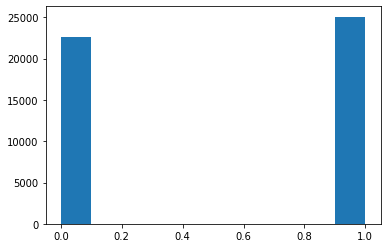

In [10]:
#Check if target label is balanced
unique, counts = np.unique(Y.values, return_counts=True)
dict(zip(unique, counts))
plt.hist(Y)
plt.show() # avoids some verbose

## The data

I had the following assumptions:
- I assumed the target variable to be 'AssimLight'
- I assumed only the outside data AKA the 'Weather.parquet' as the one influencing the outcome of AssimLight
- I assumed the dataset as balanced, and its descrepancy negliegent

## Random Forest with Feature Selection 

In [11]:
def fit_model(X, Y):
    '''Use a RandomForestClassifier for this problem.'''
    
    # define the model to use
    model = RandomForestClassifier(criterion='entropy', random_state=1337)
    
    # Train the model
    model.fit(X, Y)
    
    return model

In [12]:
def calculate_metrics(model, X_test_scaled, Y_test):
    '''Get model evaluation metrics on the test set.'''
    
    # Get model predictions
    y_predict_r = model.predict(X_test_scaled)
    
    # Calculate evaluation metrics for assesing performance of the model.
    roc=roc_auc_score(Y_test, y_predict_r)
    acc = accuracy_score(Y_test, y_predict_r)
    prec = precision_score(Y_test, y_predict_r)
    rec = recall_score(Y_test, y_predict_r)
    f1 = f1_score(Y_test, y_predict_r)
    
    return acc, roc, prec, rec, f1

In [13]:
def train_and_get_metrics(X, Y, test_size=0.2):
    '''Train a Random Forest Classifier and get evaluation metrics'''
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size,random_state = 1337)

    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Call the fit model function to train the model on the normalized features and the diagnosis values
    model = fit_model(X_train_scaled, Y_train)

    # Make predictions on test dataset and calculate metrics.
    roc, acc, prec, rec, f1 = calculate_metrics(model, X_test_scaled, Y_test)

    return acc, roc, prec, rec, f1

In [14]:
def evaluate_model_on_features(X, Y):
    '''Train model and display evaluation metrics.'''
    
    # Train the model, predict values and get metrics
    acc, roc, prec, rec, f1 = train_and_get_metrics(X, Y)

    # Construct a dataframe to display metrics.
    display_df = pd.DataFrame([[acc, roc, prec, rec, f1, X.shape[1]]], columns=["Accuracy", "ROC", "Precision", "Recall", "F1 Score", 'Feature Count'])
    
    return display_df

In [15]:
# Calculate evaluation metrics
all_features_eval_df = evaluate_model_on_features(X, Y)
all_features_eval_df.index = ['All features']

# Initialize results dataframe
results = all_features_eval_df

# Check the metrics
results.head()

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.986792,0.986804,0.987819,0.987031,0.987425,10


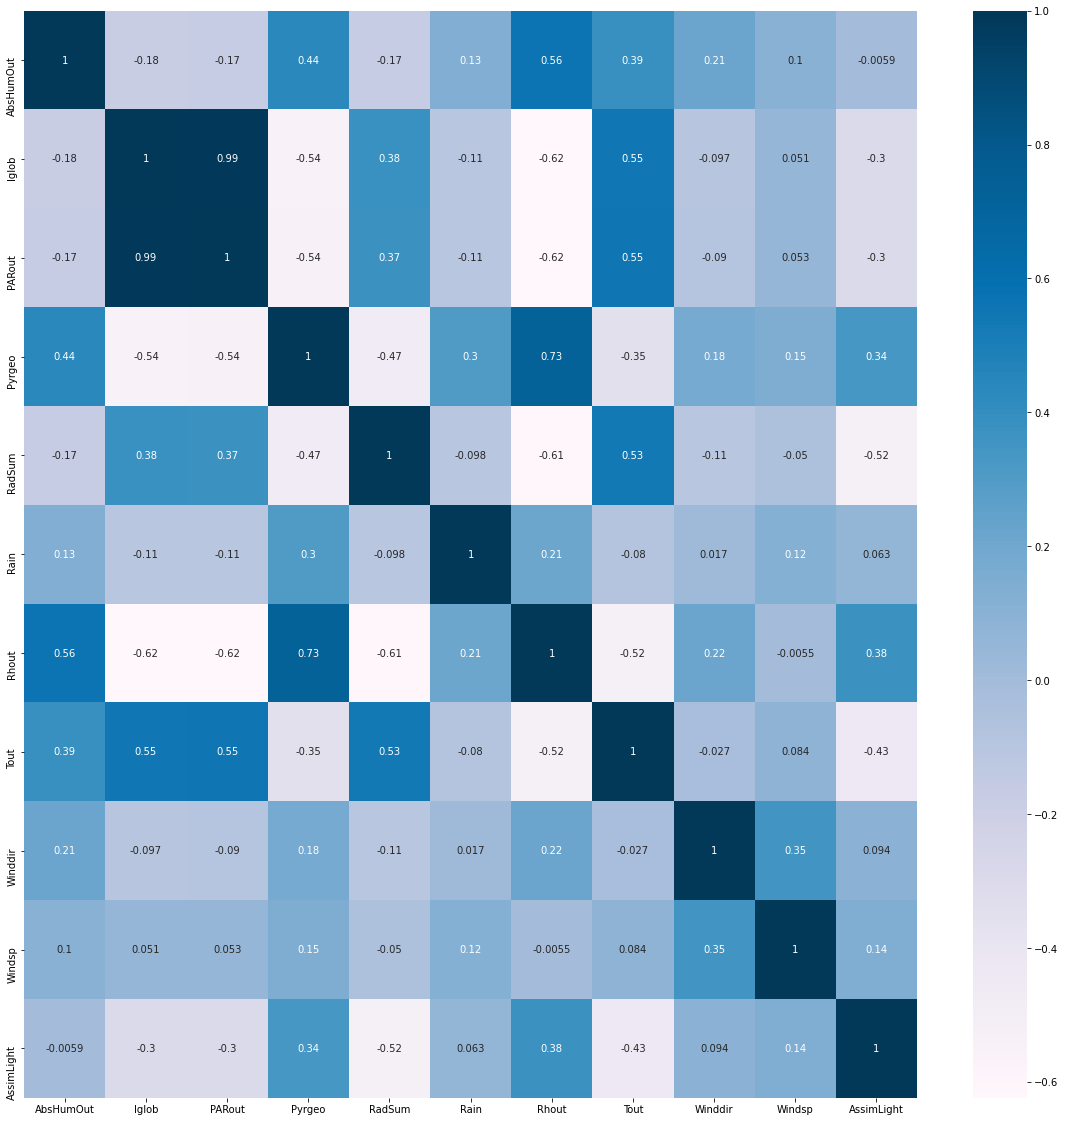

In [16]:
plt.figure(figsize=(20,20))

# Calculate correlation matrix
cor = df.corr() 

# Plot the correlation matrix
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [17]:
# Features with highest correlation to AssimLight
abs(cor['AssimLight'])

AbsHumOut     0.005855
Iglob         0.298595
PARout        0.296185
Pyrgeo        0.338450
RadSum        0.518497
Rain          0.062838
Rhout         0.377091
Tout          0.427240
Winddir       0.094239
Windsp        0.139739
AssimLight    1.000000
Name: AssimLight, dtype: float64

In [18]:
# Get the absolute value of the correlation
cor_target = abs(cor['AssimLight'])

# Select highly correlated features (thresold = 0.2)
correlated_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in correlated_features.iteritems()]

# Drop the target variable from the results
names.remove('AssimLight')

# Display the results
print(names)

['Iglob', 'PARout', 'Pyrgeo', 'RadSum', 'Rhout', 'Tout']


In [19]:
df[names]

,Iglob,PARout,Pyrgeo,RadSum,Rhout,Tout
0,0.0,0.000000e+00,-72.0,215.0,80.6,6.9
1,0.0,0.000000e+00,-73.0,0.0,80.6,6.9
2,0.0,0.000000e+00,-76.0,0.0,80.4,6.9
3,0.0,0.000000e+00,-77.0,0.0,80.2,6.9
4,0.0,0.000000e+00,-75.0,0.0,80.9,6.7
...,...,...,...,...,...,...
47803,0.0,6.710000e-08,-84.0,2992.0,71.8,15.2
47804,0.0,9.999999e-01,-85.0,2992.0,71.4,15.1
47805,0.0,1.000000e+00,-85.0,2992.0,71.5,15.0
47806,0.0,3.350000e-08,-84.0,2992.0,70.8,15.0


In [20]:
# Evaluate the model with new features
strong_features_eval_df = evaluate_model_on_features(df[names], Y)
strong_features_eval_df.index = ['Strong features']

# Append to results and display
results = results.append(strong_features_eval_df)
results.head()

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.986792,0.986804,0.987819,0.987031,0.987425,10
Strong features,0.963725,0.963972,0.962912,0.968675,0.965785,6


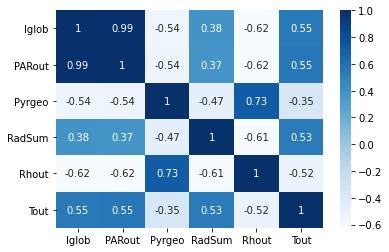

In [21]:
# Set figure size
#uncomment for larger plot
# plt.figure(figsize=(20,20))

# Calculate the correlation matrix for target relevant features that you previously determined
new_corr = df[names].corr()

# Visualize the correlation matrix
sns.heatmap(new_corr, annot=True, cmap=plt.cm.Blues)
plt.show()

In [22]:
def univariate_selection(test_size=0.2):
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size,stratify=Y, random_state = 123)
    
    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # User SelectKBest to select top 20 features based on f-test
    selector = SelectKBest(f_classif, k=4)
    
    # Fit to scaled data, then transform it
    X_new = selector.fit_transform(X_train_scaled, Y_train)
    
    # Print the results
    feature_idx = selector.get_support()
    for name, included in zip(df.drop('AssimLight',1 ).columns, feature_idx):
        print("%s: %s" % (name, included))
    
    # Drop the target variable
    feature_names = df.drop('AssimLight',1 ).columns[feature_idx]
    
    return feature_names

In [23]:

univariate_feature_names = univariate_selection()

AbsHumOut: False
Iglob: False
PARout: False
Pyrgeo: True
RadSum: True
Rain: False
Rhout: True
Tout: True
Winddir: False
Windsp: False


In [24]:
# Calculate and check model metrics
univariate_eval_df = evaluate_model_on_features(df[univariate_feature_names], Y)
univariate_eval_df.index = ['F-test']

# Append to results and display
results = results.append(univariate_eval_df)
results.head()

#Performance decreases

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.986792,0.986804,0.987819,0.987031,0.987425,10
Strong features,0.963725,0.963972,0.962912,0.968675,0.965785,6
F-test,0.962191,0.962296,0.963901,0.964286,0.964093,4


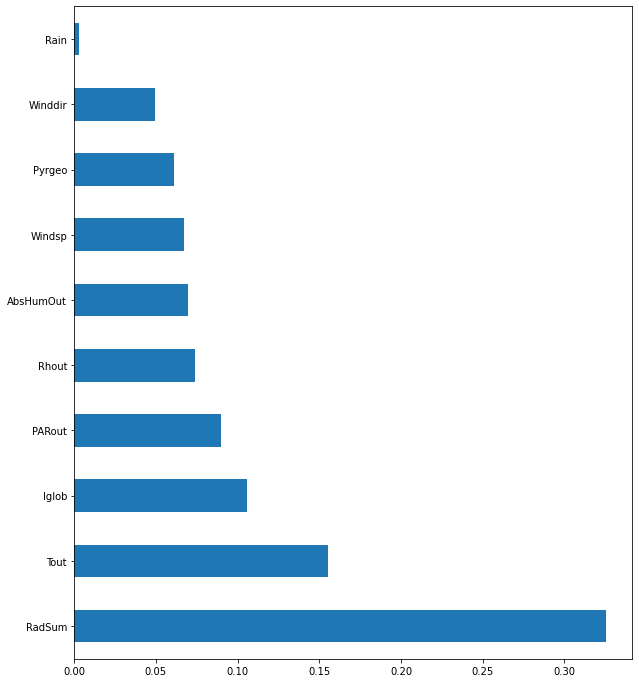

In [25]:
def feature_importances_from_tree_based_model_(test_size=0.2):
    
    # Split train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size,stratify=Y, random_state = 123)
    
    # Define the model to use
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = RandomForestClassifier()
    model = model.fit(X_train_scaled,Y_train)
    
    # Plot feature importance
    plt.figure(figsize=(10, 12))
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.sort_values(ascending=False).plot(kind='barh')
    plt.show()
    
    return model


def select_features_from_model(model):
    
    model = SelectFromModel(model, prefit=True, threshold=0.013)
    feature_idx = model.get_support()
    feature_names = df.drop('AssimLight',1 ).columns[feature_idx]
        
    return feature_names

model = feature_importances_from_tree_based_model_()
feature_imp_feature_names = select_features_from_model(model)

In [26]:
# Calculate and check model metrics
feat_imp_eval_df = evaluate_model_on_features(df[feature_imp_feature_names], Y)
feat_imp_eval_df.index = ['Feature Importance']

# Append to results and display
results = results.append(feat_imp_eval_df)
results.head()

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.986792,0.986804,0.987819,0.987031,0.987425,10
Strong features,0.963725,0.963972,0.962912,0.968675,0.965785,6
F-test,0.962191,0.962296,0.963901,0.964286,0.964093,4
Feature Importance,0.986944,0.986908,0.988798,0.986233,0.987514,9


In [27]:
def run_l1_regularization(test_size = 0.2):
    
    # Split train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state = 123)
    
    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Select L1 regulated features from LinearSVC output 
    selection = SelectFromModel(LinearSVC(C=1, penalty='l1', dual=False))
    selection.fit(X_train_scaled, Y_train)

    feature_names = df.drop('AssimLight',1 ).columns[(selection.get_support())]
    
    return feature_names

l1reg_feature_names = run_l1_regularization()

In [28]:
# Calculate and check model metrics
l1reg_eval_df = evaluate_model_on_features(df[l1reg_feature_names], Y)
l1reg_eval_df.index = ['L1 Reg']

# Append to results and display
results = results.append(l1reg_eval_df)
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.986792,0.986804,0.987819,0.987031,0.987425,10
Strong features,0.963725,0.963972,0.962912,0.968675,0.965785,6
F-test,0.962191,0.962296,0.963901,0.964286,0.964093,4
Feature Importance,0.986944,0.986908,0.988798,0.986233,0.987514,9
L1 Reg,0.986792,0.986804,0.987819,0.987031,0.987425,10


## Neural Network Approach

Simple 2 Fully Connected Layer model with CrossEntropyLosss for Sigmoid

In [29]:
def get_training_metrics(history):
  
  
  acc = history['acc']
  val_acc = history['acc_val']

  loss = history['loss']
  val_loss = history['loss_val']

  return acc, val_acc, loss, val_loss

In [30]:
def plot_train_eval(history):
  acc, val_acc, loss, val_loss = get_training_metrics(history)

  acc_plot = pd.DataFrame({"training accuracy":acc, "evaluation accuracy":val_acc})
  acc_plot = sns.lineplot(data=acc_plot)
  acc_plot.set_title('training vs evaluation accuracy')
  acc_plot.set_xlabel('epoch')
  acc_plot.set_ylabel('sparse_categorical_accuracy')
  plt.show()

  print("")

  loss_plot = pd.DataFrame({"training loss":loss, "evaluation loss":val_loss})
  loss_plot = sns.lineplot(data=loss_plot)
  loss_plot.set_title('training vs evaluation loss')
  loss_plot.set_xlabel('epoch')
  loss_plot.set_ylabel('loss')
  plt.show()

In [31]:
def calculate_metrics_nn(model, val_loader):
    '''Get model evaluation metrics on the test set.'''

    for x, y in val_loader:
        with torch.no_grad():
            output = model(x.float().cuda())

            y_pred.append(output.detach().cpu().numpy())
            y_ground.append(y.numpy())

    y_predict_r = np.where(np.concatenate(y_pred) > 0.5, 1, 0).squeeze()
    Y_test = np.concatenate(y_ground)
    
    # Calculate evaluation metrics for assesing performance of the model.
    roc=roc_auc_score(Y_test, y_predict_r)
    acc = accuracy_score(Y_test, y_predict_r)
    prec = precision_score(Y_test, y_predict_r)
    rec = recall_score(Y_test, y_predict_r)
    f1 = f1_score(Y_test, y_predict_r)
    
    return acc, roc, prec, rec, f1

In [32]:
from model import Lights
from dataset import Weather

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm, trange
import torch.backends.cudnn as cudnn

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.9,random_state = 1337)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

epochs = 30 # 100
batch_size = 24

train_loader = DataLoader(Weather(X_train_scaled, Y_train), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(Weather(X_test_scaled, Y_test), batch_size=batch_size, shuffle=True)

model = Lights()
model.cuda()
cudnn.benchmark = True
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
loss_fn = nn.BCEWithLogitsLoss()

history = {'acc':  [], 'acc_val': [], 'loss': [], 'loss_val':[]}
for epoch in trange(epochs):
    model.train()
    y_pred = []
    y_ground = []
    losses = []
    for x, y in train_loader:
        optimizer.zero_grad()
        output = model(x.float().cuda())
        loss = loss_fn(output.squeeze(), y.float().cuda())
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        y_pred.append(output.detach().cpu().numpy())
        y_ground.append(y.numpy())

    y_pred = np.where(np.concatenate(y_pred) > 0.5, 1, 0).squeeze()
    y_ground = np.concatenate(y_ground)
    acc = sum(y_pred == y_ground) / len(y_pred)

    history['loss'].append(sum(losses)/len(losses))
    history['acc'].append(acc)

    model.eval()
    y_pred = []
    y_ground = []
    losses = []
    for x, y in val_loader:
        with torch.no_grad():
            output = model(x.float().cuda())
            loss = loss_fn(output.squeeze(), y.float().cuda())

            losses.append(loss.item())
            y_pred.append(output.detach().cpu().numpy())
            y_ground.append(y.numpy())

    y_pred = np.where(np.concatenate(y_pred) > 0.5, 1, 0).squeeze()
    y_ground = np.concatenate(y_ground)
    acc = sum(y_pred == y_ground) / len(y_pred)

    history['loss_val'].append(sum(losses)/len(losses))
    history['acc_val'].append(acc)

/home/mvalente/.config/anaconda3/envs/torcha/lib/python3.7/site-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
100%|██████████| 30/30 [01:05<00:00,  2.20s/it]


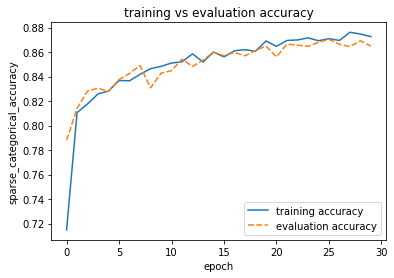

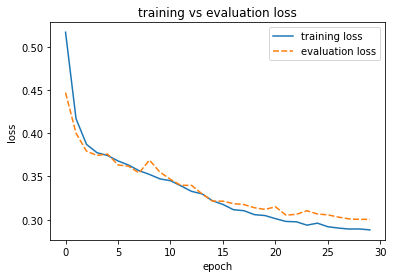

In [34]:
plot_train_eval(history)

In [35]:
metrics = list(calculate_metrics_nn(model,val_loader))
metrics.append(10)
rnn_df = pd.DataFrame([metrics], columns=["Accuracy", "ROC", "Precision", "Recall", "F1 Score",'Feature Count'])


rnn_df.index = ['LightsNN']

# Append to results and display
results = results.append(rnn_df)
results.head(n=10)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

## Discussion

- Both aproaches RandomForest and the Neural network achieve good prediction as to when the light should be on, therefore automation is very doable.


## Next step

1. Build an essemble of models and deploy
2. Investigate temporal dynamics and dependencies/seasonality
